In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
# Load the data
data = pd.read_csv("Fraud(4).csv")
print(data)


         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [3]:
# Drop the 'isFlaggedFraud' column
data.drop(['isFlaggedFraud'], axis=1, inplace=True)

# Check for null values
print(data.isnull().sum())  # Output should be zeroes for all columns

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [4]:
# Split the data into legitimate and fraudulent transactions
legit = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [5]:
# Print shapes of the subsets
print("Legitimate transactions shape:", legit.shape)
print("Fraudulent transactions shape:", fraud.shape)

Legitimate transactions shape: (6354407, 10)
Fraudulent transactions shape: (8213, 10)


In [6]:
# Display mean transaction amount for each class
print("Legitimate transactions amount mean:", legit.amount.mean())
print("Fraudulent transactions amount mean:", fraud.amount.mean())

Legitimate transactions amount mean: 178197.04172740763
Fraudulent transactions amount mean: 1467967.299140387


In [7]:
# Display descriptive statistics of legitimate transactions amount
print(legit.amount.describe())

# Sample legitimate transactions to balance the dataset
legit_sample = legit.sample(n=8123)

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64


In [8]:
# Combine sampled legitimate transactions with fraudulent transactions
new_data = pd.concat([legit_sample, fraud], axis=0)

# Display the class distribution in the new dataset
print(new_data['isFraud'].value_counts())


isFraud
1    8213
0    8123
Name: count, dtype: int64


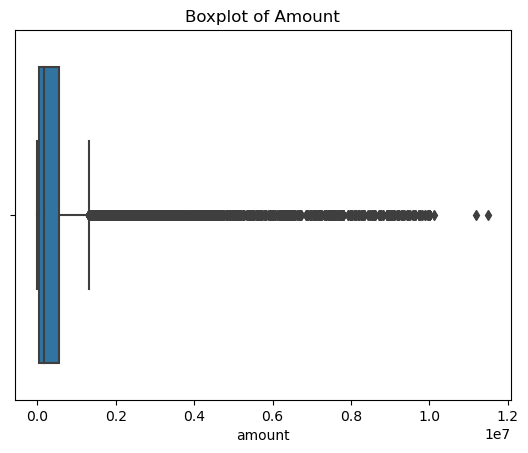

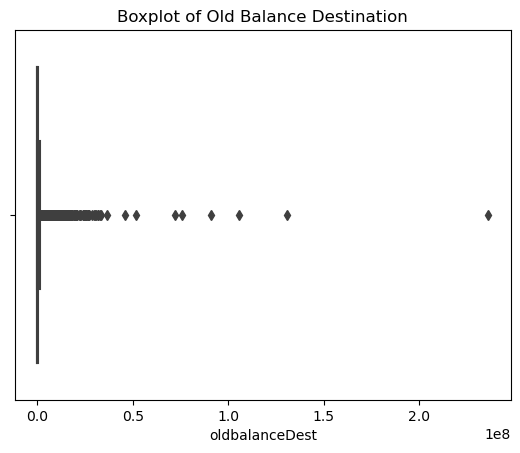

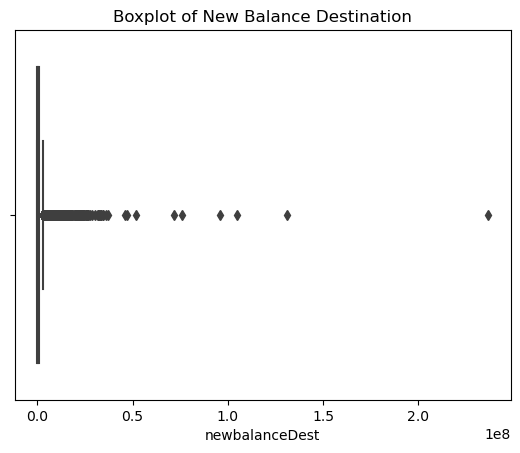

In [9]:
# Visualize outliers
sns.boxplot(x=new_data['amount'])
plt.title('Boxplot of Amount')
plt.show()

sns.boxplot(x=new_data['oldbalanceDest'])
plt.title('Boxplot of Old Balance Destination')
plt.show()


sns.boxplot(x=new_data['newbalanceDest'])
plt.title('Boxplot of New Balance Destination')
plt.show()



In [10]:
# Treat outliers using Z-scores
z_score = stats.zscore(new_data['amount'])
new_data = new_data[(z_score < 2) & (z_score > -2)]

z_score = stats.zscore(new_data['oldbalanceDest'])
new_data = new_data[(z_score < 2) & (z_score > -2)]

z_score = stats.zscore(new_data['newbalanceDest'])
new_data = new_data[(z_score < 2) & (z_score > -2)]

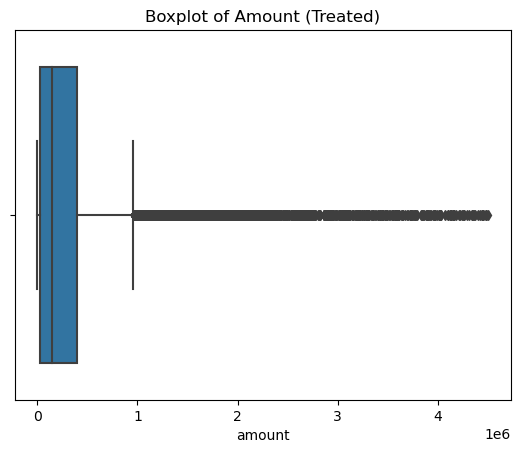

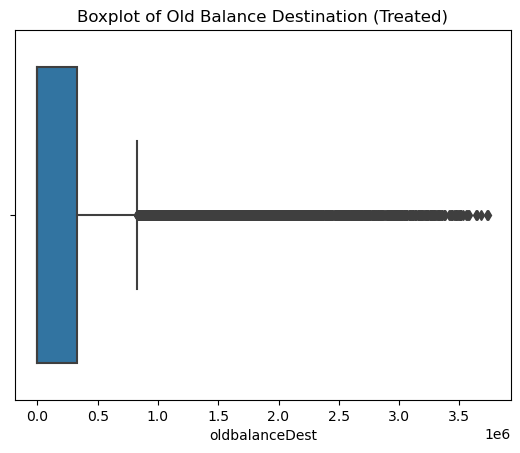

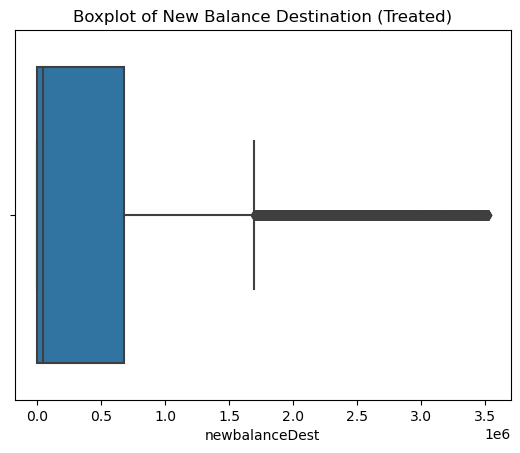

In [11]:
# Visualize treated outliers
sns.boxplot(x=new_data['amount'])
plt.title('Boxplot of Amount (Treated)')
plt.show()

sns.boxplot(x=new_data['oldbalanceDest'])
plt.title('Boxplot of Old Balance Destination (Treated)')
plt.show()

sns.boxplot(x=new_data['newbalanceDest'])
plt.title('Boxplot of New Balance Destination (Treated)')
plt.show()

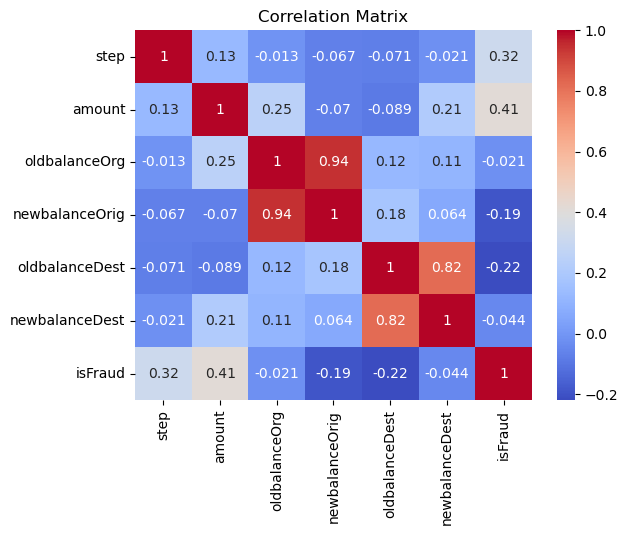

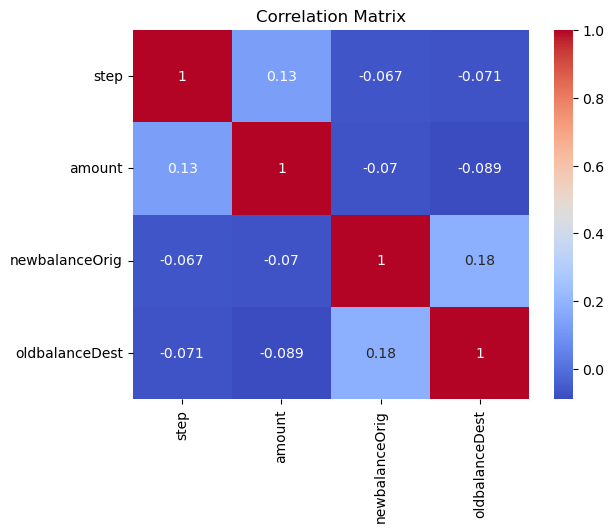

In [12]:
# Filter only numeric columns for the correlation matrix
new_data
numeric_data = new_data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Drop insignificant and highly collinear features
X = new_data.drop(columns=['isFraud', 'oldbalanceOrg', 'newbalanceDest', 'type', 'nameOrig', 'nameDest'], axis=1)
Y = new_data['isFraud']

#Matrix after removing highly collinear features
# Plot the heatmap
correlation_matrix_new = X.corr()
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=3)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (12136, 4)
Testing set shape: (2142, 4)


In [14]:
# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logistic_model.fit(X_train, Y_train)

# Evaluate Logistic Regression model
logistic_train_pred = logistic_model.predict(X_train)
logistic_test_pred = logistic_model.predict(X_test)
logistic_train_acc = accuracy_score(logistic_train_pred, Y_train)
logistic_test_acc = accuracy_score(logistic_test_pred, Y_test)

In [15]:
print("Logistic Regression - Training Accuracy:", logistic_train_acc)
print("Logistic Regression - Testing Accuracy:", logistic_test_acc)

Logistic Regression - Training Accuracy: 0.7321193144363876
Logistic Regression - Testing Accuracy: 0.726890756302521


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Create a confusion matrix
conf_mat = confusion_matrix(Y_test, logistic_test_pred)

# Create a pandas DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix (Testing):")
print(conf_df)

Confusion Matrix (Testing):
                 Predicted Negative  Predicted Positive
Actual Negative                 615                 495
Actual Positive                  90                 942


In [17]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, logistic_test_pred)
print("Accuracy (Testing):", accuracy)


Accuracy (Testing): 0.726890756302521


In [18]:
# Calculate misclassification rate
misclassification_rate = 1 - accuracy
print("Misclassification Rate (Testing):", misclassification_rate)

Misclassification Rate (Testing): 0.273109243697479


In [19]:
# Calculate true positive rate, false positive rate, true negative rate
tn, fp, fn, tp = conf_mat.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
print("Recall (Testing):", true_positive_rate)
print("False Positive Rate (Testing):", false_positive_rate)
print("Specificity (Testing):", true_negative_rate)

Recall (Testing): 0.9127906976744186
False Positive Rate (Testing): 0.44594594594594594
Specificity (Testing): 0.5540540540540541


In [20]:
# Calculate precision
precision = tp / (tp + fp)
print("Precision (Testing):", precision)


Precision (Testing): 0.6555323590814196


In [21]:
# Calculate prevalence
prevalence = (tp + fn) / (tp + tn + fp + fn)
print("Prevalence (Testing):", prevalence)


Prevalence (Testing): 0.48179271708683474


In [22]:
# Calculate F1 score
f1 = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)
print("F1 Score (Testing):", f1)


F1 Score (Testing): 0.7630619684082623


In [23]:
# Print classification report
print("Classification Report (Testing):")
print(classification_report(Y_test, logistic_test_pred))

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.87      0.55      0.68      1110
           1       0.66      0.91      0.76      1032

    accuracy                           0.73      2142
   macro avg       0.76      0.73      0.72      2142
weighted avg       0.77      0.73      0.72      2142



In [24]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Evaluate Random Forest model
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_acc = accuracy_score(rf_train_pred, Y_train)
rf_test_acc = accuracy_score(rf_test_pred, Y_test)

In [25]:
print("Random Forest - Training Accuracy:", rf_train_acc)
print("Random Forest - Testing Accuracy:", rf_test_acc)

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.8823529411764706


In [26]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Evaluate Decision Tree model
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
dt_train_acc = accuracy_score(dt_train_pred, Y_train)
dt_test_acc = accuracy_score(dt_test_pred, Y_test)

In [27]:
print("Decision Tree - Training Accuracy:", dt_train_acc)
print("Decision Tree - Testing Accuracy:", dt_test_acc)

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.8594771241830066


In [28]:
# Train K-Nearest Neighbors model
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, Y_train)

# Evaluate K-Nearest Neighbors model
kn_train_pred = kn_model.predict(X_train)
kn_test_pred = kn_model.predict(X_test)
kn_train_acc = accuracy_score(kn_train_pred, Y_train)
kn_test_acc = accuracy_score(kn_test_pred, Y_test)

In [29]:
print("K-Nearest Neighbors - Training Accuracy:", kn_train_acc)
print("K-Nearest Neighbors - Testing Accuracy:", kn_test_acc)

K-Nearest Neighbors - Training Accuracy: 0.8685728411338167
K-Nearest Neighbors - Testing Accuracy: 0.8090569561157797
